In [1]:
import gc
import random
from datetime import datetime

In [2]:
import torch
from torch import nn

In [3]:
from utils_random import set_random_seed
from utils_torch.data import stratified_random_split
from utils_torch.modules import get_seq_size_out
from utils_attacker_lstm.data import DatasetAttackerLSTMBeacon, DataLoaderAttackerLSTM
from utils_attacker_lstm.models import ModelAttackerLSTMNew, TrainerAttackerLSTM, TesterAttackerLSTM, \
    ManagerAttackerLSTM
from utils_plot import plot_train_eval_loss_accuracy, plot_receiver_operating_characteristics_curve, \
    plot_confusion_matrix, plot_long_short_term_memory

Model 0
Model ID: 12060450


100%|██████████| 256/256 [02:36<00:00,  1.64it/s]


Best evaluation loss epoch found at: 221
Best evaluation loss found: 0.6927
Best evaluation accuracy found: 0.5000
Test loss: 0.6930
Test accuracy: 0.50
Test precision: 0.50
Test recall: 1.00
Test f1: 0.67
Test AUC: 0.50
Model 1
Model ID: 12060453


100%|██████████| 256/256 [04:42<00:00,  1.10s/it]


Best evaluation loss epoch found at: 8
Best evaluation loss found: 0.6886
Best evaluation accuracy found: 0.5000
Test loss: 0.6973
Test accuracy: 0.50
Test precision: 0.50
Test recall: 1.00
Test f1: 0.67
Test AUC: 0.50
Model 2
Model ID: 12060457


100%|██████████| 256/256 [02:12<00:00,  1.93it/s]


Best evaluation loss epoch found at: 72
Best evaluation loss found: 0.6928
Best evaluation accuracy found: 0.5000
Test loss: 0.6920
Test accuracy: 0.50
Test precision: 0.00
Test recall: 0.00
Test f1: 0.00
Test AUC: 0.50


C:\Users\Zhou\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\rnn.py:878: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ..\aten\src\ATen\native\cudnn\RNN.cpp:982.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


Model 3
Model ID: 12060500
lstm_output_size_out must be equal to linear_num_features_in
Model 3
Model ID: 12060500


100%|██████████| 256/256 [02:56<00:00,  1.45it/s]


Best evaluation loss epoch found at: 2
Best evaluation loss found: 0.6894
Best evaluation accuracy found: 0.5000
Test loss: 0.6970
Test accuracy: 0.50
Test precision: 0.00
Test recall: 0.00
Test f1: 0.00
Test AUC: 0.50


C:\Users\Zhou\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\rnn.py:878: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ..\aten\src\ATen\native\cudnn\RNN.cpp:982.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


Model 4
Model ID: 12060503


  0%|          | 0/256 [00:00<?, ?it/s]


KeyboardInterrupt: 

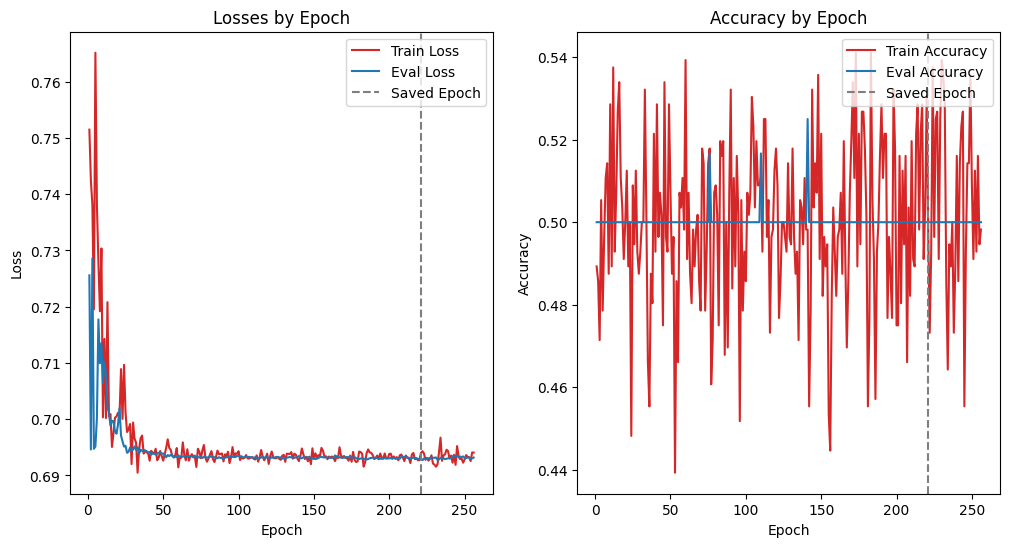

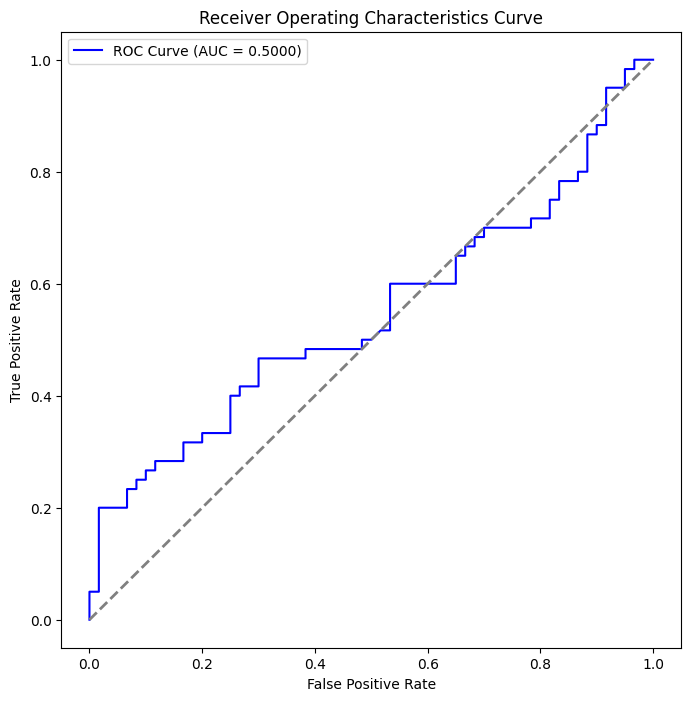

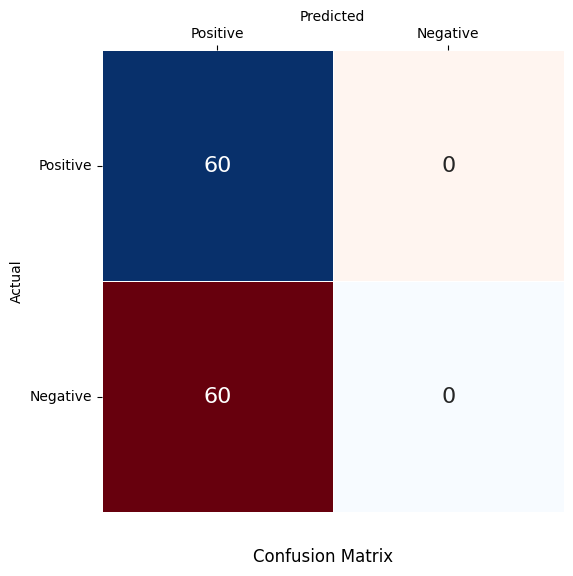

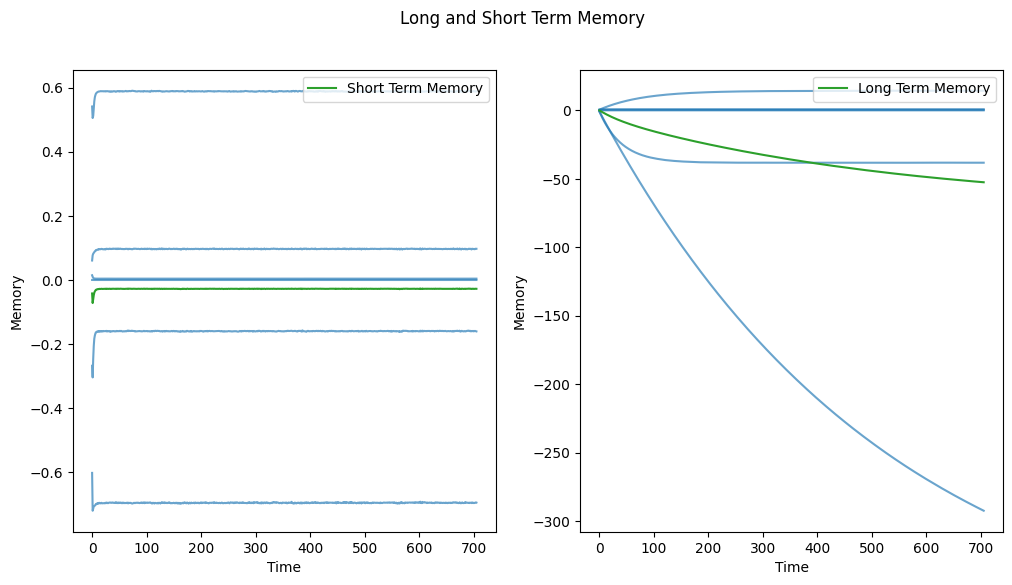

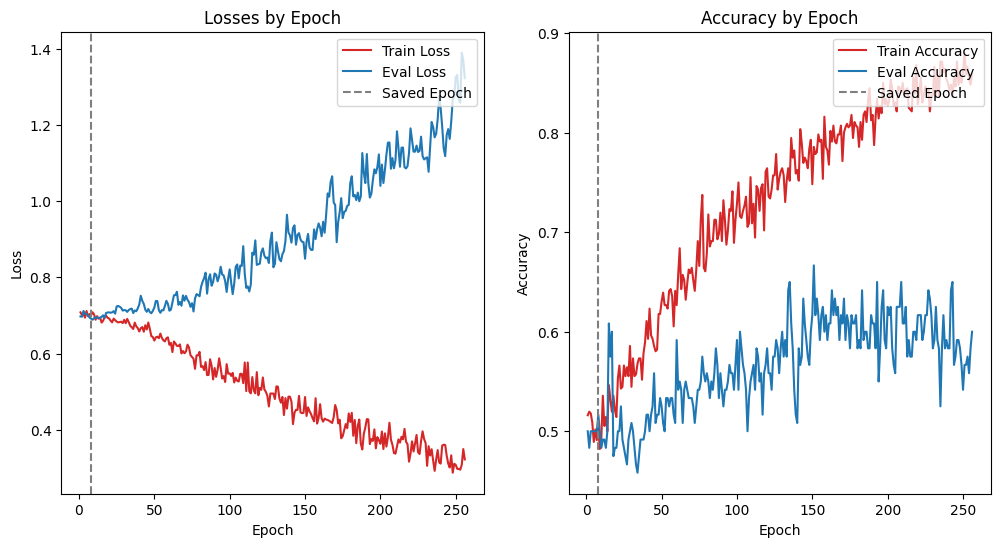

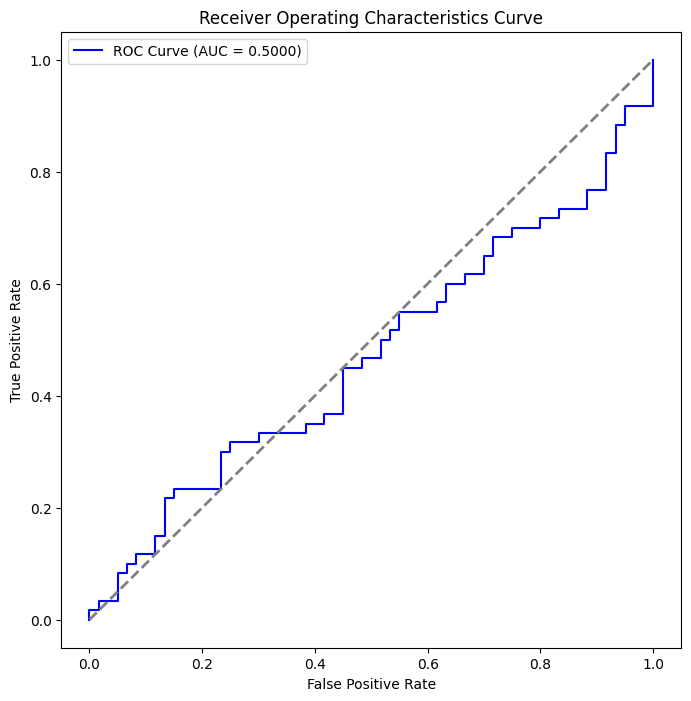

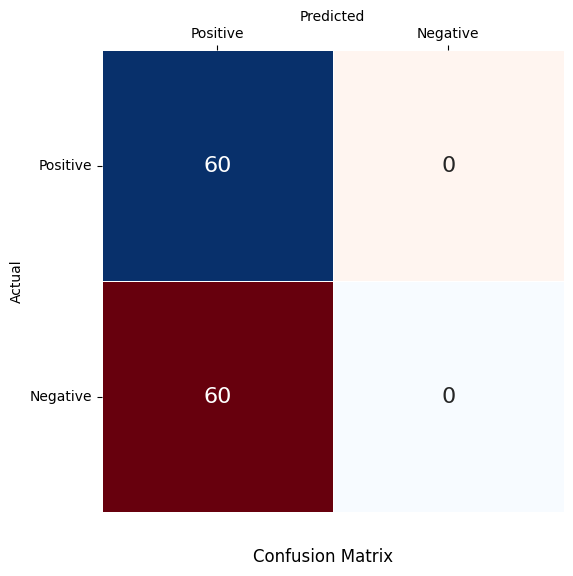

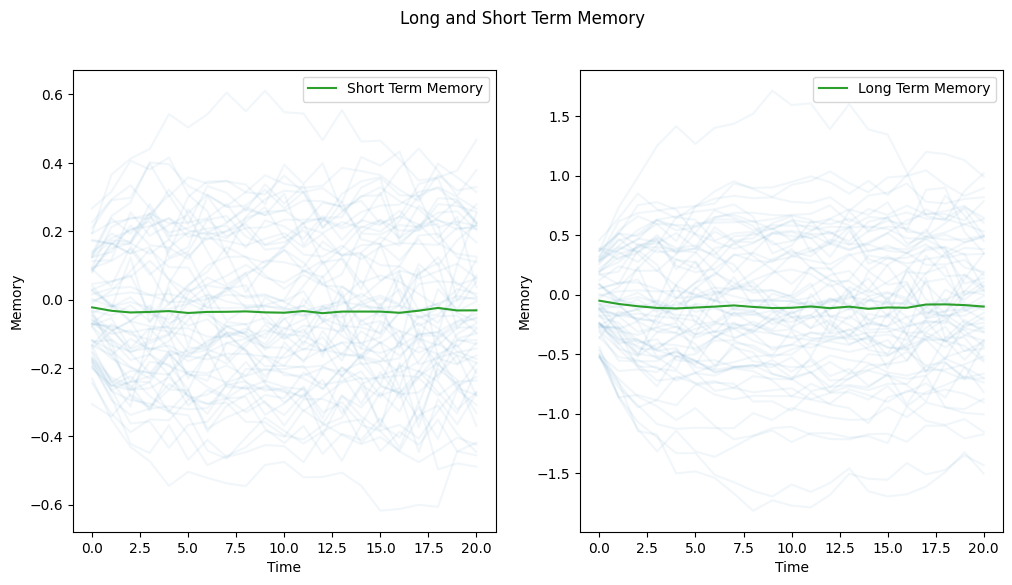

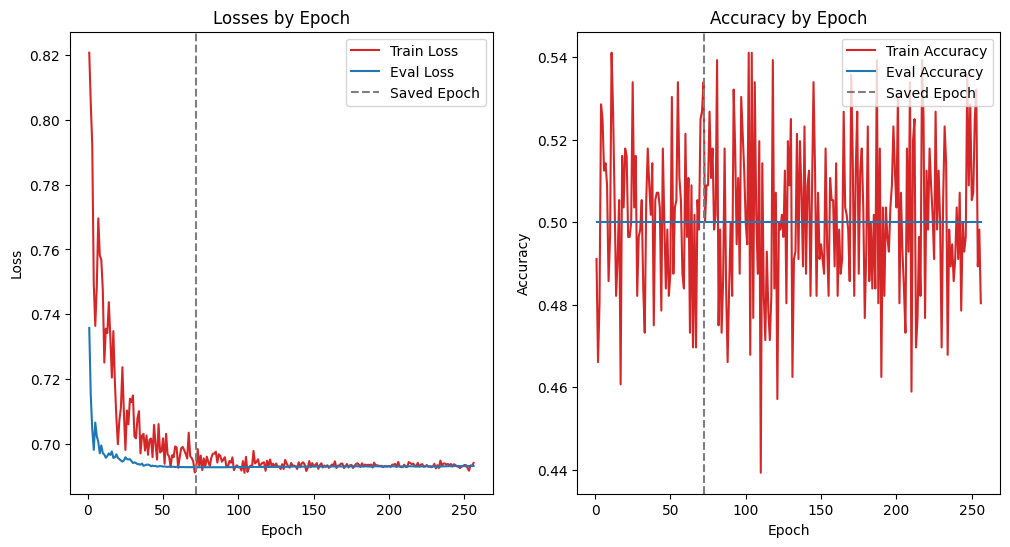

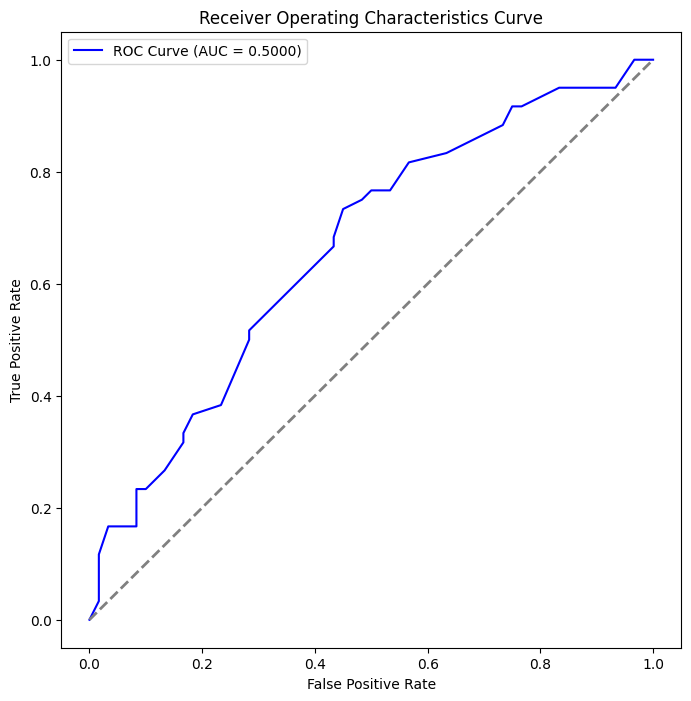

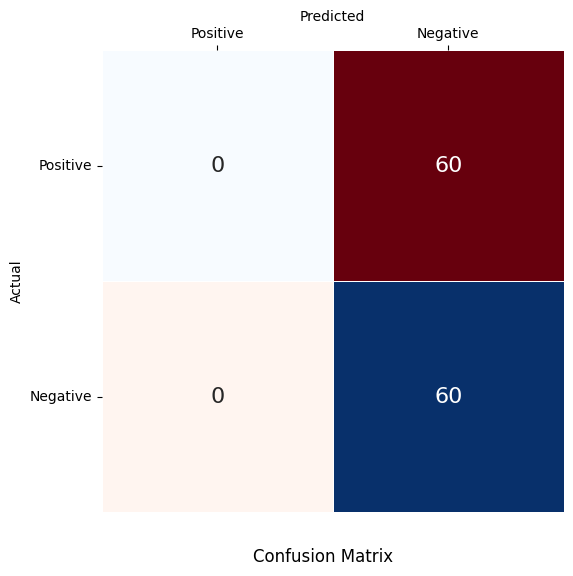

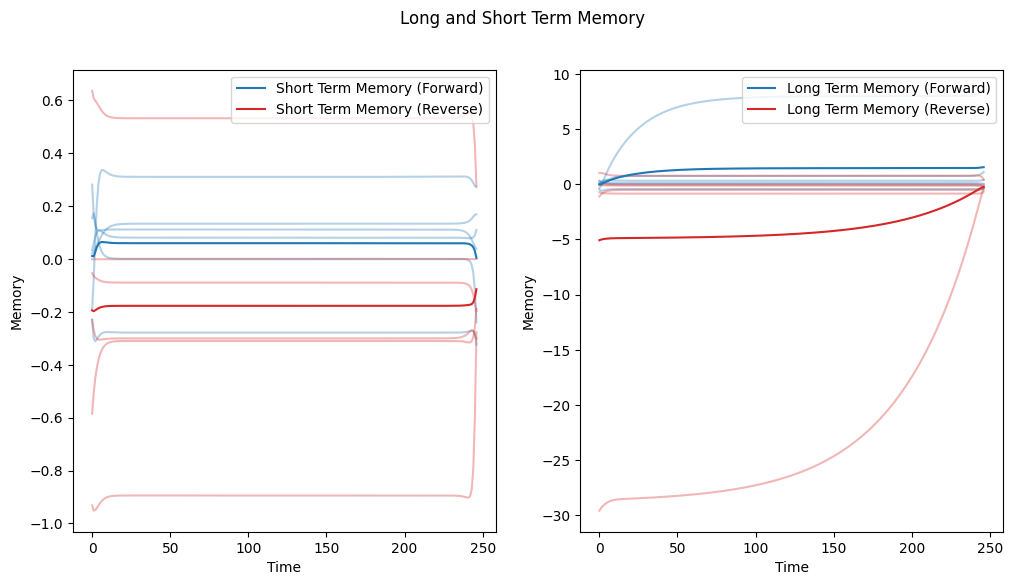

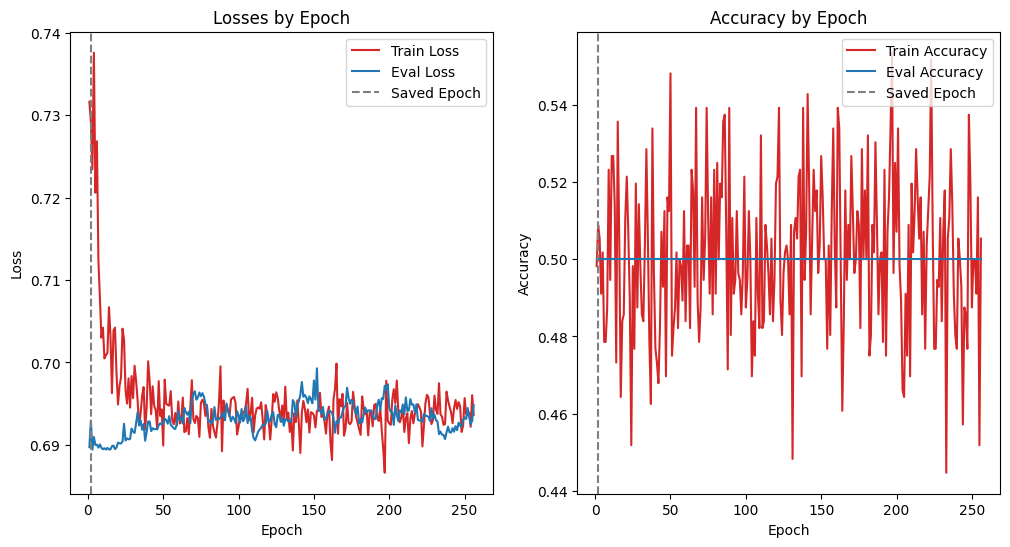

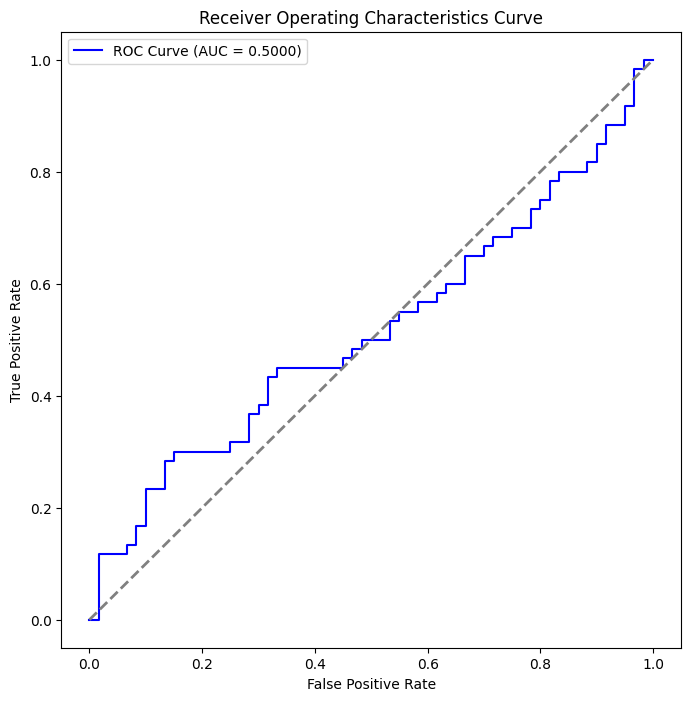

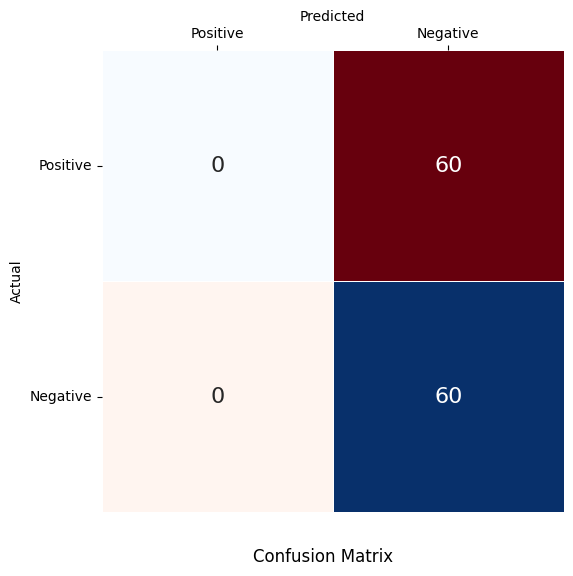

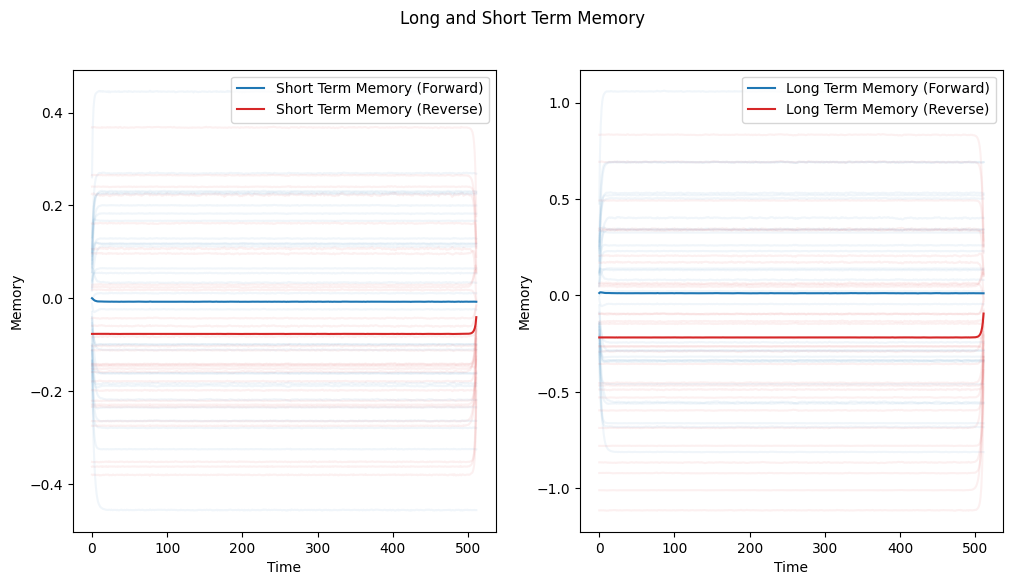

In [4]:
idx = 0
while True:
    try:
        model_id = datetime.now().strftime("%m%d%H%M")
        print("=" * 25)
        print(f"Model {idx}")
        print(f"Model ID: {model_id}")
        random_seed = random.randint(0, 2 ** 32 - 1)
        set_random_seed(random_seed)
        num_snps = random.choice([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])
        train_eval_test_split = [0.7, 0.15, 0.15]
        genome_batch_size = random.randint(16, 64)
        snp_batch_size = num_snps
        found = False
        while not found:
            conv_num_layers = random.randint(1, 8)
            conv_channel_size = [3] + [random.randint(16, 64) for _ in range(conv_num_layers)]
            conv_kernel_size = [random.randint(4, 32) for _ in range(conv_num_layers)]
            conv_stride = [random.randint(1, conv_kernel_size[i]) for i in range(conv_num_layers)]
            conv_dilation = [random.randint(1, 4) for _ in range(conv_num_layers)]
            conv_groups = [1 for _ in range(conv_num_layers)]
            found = True
            sequence_size = num_snps
            for i in range(conv_num_layers):
                sequence_size = get_seq_size_out(seq_size_in=sequence_size,
                                                 kernel_size=conv_kernel_size[i],
                                                 stride=conv_stride[i],
                                                 padding=0,
                                                 dilation=conv_dilation[i])
                if sequence_size < conv_kernel_size[i]:
                    found = False
                    break
        conv_activation = random.choice([nn.ReLU, nn.Tanh, nn.Sigmoid, nn.LeakyReLU])
        conv_activation_kwargs = {}
        conv_dropout_p = [random.uniform(0, 0.66) for _ in range(conv_num_layers - 1)]
        conv_dropout_first = [random.choice([True, False]) for _ in range(conv_num_layers - 1)]
        conv_batch_norm = [random.choice([True, False]) for _ in range(conv_num_layers - 1)]
        conv_batch_norm_momentum = [random.uniform(0, 1) for _ in range(conv_num_layers - 1)]
        conv_lstm_activation = random.choice([nn.ReLU, nn.Tanh, nn.Sigmoid, nn.LeakyReLU])
        conv_lstm_activation_kwargs = {}
        conv_lstm_dropout_p = random.uniform(0, 0.66)
        conv_lstm_dropout_first = random.choice([True, False])
        conv_lstm_layer_norm = random.choice([True, False])
        lstm_num_layers = random.randint(1, 4)
        lstm_input_size = conv_channel_size[-1]
        lstm_hidden_size = [random.randint(4, 64) for _ in range(lstm_num_layers)]
        lstm_proj_size = [0 for _ in range(lstm_num_layers)]
        lstm_bidirectional = [random.choice([True, False]) for _ in range(lstm_num_layers)]
        lstm_dropout_p = [random.uniform(0, 0.66) for _ in range(lstm_num_layers - 1)]
        lstm_dropout_first = [random.choice([True, False]) for _ in range(lstm_num_layers - 1)]
        lstm_layer_norm = [random.choice([True, False]) for _ in range(lstm_num_layers - 1)]
        lstm_linear_dropout_p = random.uniform(0, 0.66)
        lstm_linear_dropout_first = random.choice([True, False])
        lstm_linear_batch_norm = random.choice([True, False])
        lstm_linear_batch_norm_momentum = random.uniform(0, 1)
        linear_num_layers = random.randint(1, 4)
        linear_num_features = [lstm_hidden_size[-1] * (2 if any(lstm_bidirectional) else 1)] + [random.randint(4, 64)
                                                                                                for _
                                                                                                in range(
                linear_num_layers - 1)] + [1]
        linear_activation = random.choice([nn.ReLU, nn.Tanh, nn.Sigmoid, nn.LeakyReLU])
        linear_activation_kwargs = {}
        linear_dropout_p = [random.uniform(0, 0.66) for _ in range(linear_num_layers - 1)]
        linear_dropout_first = [random.choice([True, False]) for _ in range(linear_num_layers - 1)]
        linear_batch_norm = [random.choice([True, False]) for _ in range(linear_num_layers - 1)]
        linear_batch_norm_momentum = [random.uniform(0, 1) for _ in range(linear_num_layers - 1)]
        num_epochs = 256
        learning_rate = 0.001
        models_dir = "../models"
        models_file = "models.csv"
        plots_dir = "../plots"
        if torch.backends.mps.is_available():
            device = torch.device('mps')
        elif torch.cuda.is_available():
            device = torch.device('cuda')
        else:
            device = torch.device('cpu')
        dataset = DatasetAttackerLSTMBeacon(genomes_beacon_path="../data/test/In_Pop.pkl",
                                            genomes_reference_path="../data/test/Not_In_Pop.pkl",
                                            num_snps=num_snps)
        subset_train, subset_eval, subset_test = stratified_random_split(dataset=dataset,
                                                                         ratios=train_eval_test_split)
        dataloader_train = DataLoaderAttackerLSTM(dataset=subset_train,
                                                  genome_batch_size=genome_batch_size,
                                                  snp_batch_size=snp_batch_size,
                                                  shuffle=True)
        dataloader_eval = DataLoaderAttackerLSTM(dataset=subset_eval,
                                                 genome_batch_size=genome_batch_size,
                                                 snp_batch_size=snp_batch_size,
                                                 shuffle=False)
        dataloader_test = DataLoaderAttackerLSTM(dataset=subset_test,
                                                 genome_batch_size=genome_batch_size,
                                                 snp_batch_size=snp_batch_size,
                                                 shuffle=False)
        model = ModelAttackerLSTMNew(conv_num_layers=conv_num_layers,
                                     conv_channel_size=conv_channel_size,
                                     conv_kernel_size=conv_kernel_size,
                                     conv_stride=conv_stride,
                                     conv_dilation=conv_dilation,
                                     conv_groups=conv_groups,
                                     conv_activation=conv_activation,
                                     conv_activation_kwargs=conv_activation_kwargs,
                                     conv_dropout_p=conv_dropout_p,
                                     conv_dropout_first=conv_dropout_first,
                                     conv_batch_norm=conv_batch_norm,
                                     conv_batch_norm_momentum=conv_batch_norm_momentum,
                                     conv_lstm_activation=conv_lstm_activation,
                                     conv_lstm_activation_kwargs=conv_lstm_activation_kwargs,
                                     conv_lstm_dropout_p=conv_lstm_dropout_p,
                                     conv_lstm_dropout_first=conv_lstm_dropout_first,
                                     conv_lstm_layer_norm=conv_lstm_layer_norm,
                                     lstm_num_layers=lstm_num_layers,
                                     lstm_input_size=lstm_input_size,
                                     lstm_hidden_size=lstm_hidden_size,
                                     lstm_proj_size=lstm_proj_size,
                                     lstm_bidirectional=lstm_bidirectional,
                                     lstm_dropout_p=lstm_dropout_p,
                                     lstm_dropout_first=lstm_dropout_first,
                                     lstm_layer_norm=lstm_layer_norm,
                                     lstm_linear_dropout_p=lstm_linear_dropout_p,
                                     lstm_linear_dropout_first=lstm_linear_dropout_first,
                                     lstm_linear_batch_norm=lstm_linear_batch_norm,
                                     lstm_linear_batch_norm_momentum=lstm_linear_batch_norm_momentum,
                                     linear_num_layers=linear_num_layers,
                                     linear_num_features=linear_num_features,
                                     linear_activation=linear_activation,
                                     linear_activation_kwargs=linear_activation_kwargs,
                                     linear_dropout_p=linear_dropout_p,
                                     linear_dropout_first=linear_dropout_first,
                                     linear_batch_norm=linear_batch_norm,
                                     linear_batch_norm_momentum=linear_batch_norm_momentum)
        model.to(device)
        criterion = nn.BCEWithLogitsLoss()
        optimizer = torch.optim.Adam(params=model.parameters(),
                                     lr=learning_rate)
        scheduler = None
        trainer = TrainerAttackerLSTM(model=model,
                                      criterion=criterion,
                                      optimizer=optimizer,
                                      scheduler=scheduler,
                                      train_loader=dataloader_train,
                                      eval_loader=dataloader_eval,
                                      device=device,
                                      max_grad_norm=1.0,
                                      norm_type=2)
        tester = TesterAttackerLSTM(model=model,
                                    criterion=criterion,
                                    test_loader=dataloader_test,
                                    device=device)
        manager = ManagerAttackerLSTM(models_dir=models_dir,
                                      models_file=models_file)
        trainer.train(num_epochs=num_epochs,
                      verbose=False)
        finish_time = datetime.now()
        best_eval_loss_epoch = trainer.best_eval_loss_epoch
        best_eval_loss = trainer.best_eval_loss
        best_eval_accuracy = trainer.eval_accuracies[best_eval_loss_epoch]
        # print(f'Finished training at {finish_time}')
        print(f'Best evaluation loss epoch found at: {best_eval_loss_epoch}')
        print(f'Best evaluation loss found: {best_eval_loss:.4f}')
        print(f'Best evaluation accuracy found: {best_eval_accuracy:.4f}')
        plot_train_eval_loss_accuracy(train_loss=trainer.train_losses,
                                      train_accuracy=trainer.train_accuracies,
                                      eval_loss=trainer.eval_losses,
                                      eval_accuracy=trainer.eval_accuracies,
                                      saved_epoch=best_eval_loss_epoch,
                                      output_path=plots_dir,
                                      output_file=f"model_attacker_beacon_{model_id}_train_eval_loss_acc.png",
                                      show=False)
        tester.test()
        print(f'Test loss: {tester.loss:.4f}')
        print(f'Test accuracy: {tester.accuracy_score:.2f}')
        print(f'Test precision: {tester.precision_score:.2f}')
        print(f'Test recall: {tester.recall_score:.2f}')
        print(f'Test f1: {tester.f1_score:.2f}')
        print(f'Test AUC: {tester.auroc_score:.2f}')
        fpr, tpr, _ = tester.roc_curve
        plot_receiver_operating_characteristics_curve(false_positive_rates=fpr,
                                                      true_positive_rates=tpr,
                                                      auc=tester.auroc_score,
                                                      output_path=plots_dir,
                                                      output_file=f"model_attacker_beacon_{model_id}_roc_curve.png",
                                                      show=False)
        plot_confusion_matrix(confusion_matrix=tester.confusion_matrix_scores,
                              task="binary",
                              output_path=plots_dir,
                              output_file=f"model_attacker_beacon_{model_id}_confusion_matrix.png",
                              show=False)
        manager.add_model(model_id=model_id,
                          random_seed=random_seed,
                          data=dataset,
                          loader=dataloader_train,
                          model=model,
                          trainer=trainer,
                          tester=tester)
        model.set_hidden_cell_mode(True)
        model.eval()
        with torch.no_grad():
            x, y = dataloader_test.dataset[0]
            x = x.unsqueeze(0).to(device)
            hx = None
            logits, out = model.forward(x, hx)
        out_last = out[-1]
        (h, c), (h_last, c_last) = out_last
        h, c = h.squeeze(0), c.squeeze(0)
        plot_long_short_term_memory(long_term_memory=c.cpu(),
                                    short_term_memory=h.cpu(),
                                    bidirectional=lstm_bidirectional[-1],
                                    output_path=plots_dir,
                                    output_file=f"model_attacker_beacon_{model_id}_lstm.png",
                                    show=False)
        idx += 1
        model.cpu()
        del model, criterion, optimizer, scheduler, trainer, tester, manager
        torch.cuda.empty_cache()
        gc.collect()
    except Exception as e:
        print(e)
        continue